# Programming Exercise 2: Logistic Regression

## Introduction

Trong bài tập này, bạn sẽ thực hiện hồi quy logistic và áp dụng nó cho hai bộ dữ liệu khác nhau.Trước khi bắt đầu bài tập lập trình, chúng tôi thực sự khuyên bạn nên xem các bài giảng video và hoàn thành các câu hỏi đánh giá cho các chủ đề liên quan.\
In this exercise, you will implement logistic regression and apply it to two different datasets. Before starting on the programming exercise, we strongly recommend watching the video lectures and completing the review questions for the associated topics.

Tất cả các thông tin bạn cần để giải quyết bài tập này nằm trong sổ ghi chép này và tất cả các mã bạn sẽ thực hiện sẽ diễn ra trong sổ ghi chép này.Bài tập có thể được submit lên grader của Coursera trực tiếp từ notebook này (code và hướng dẫn được bao gồm bên dưới).\
All the information you need for solving this assignment is in this notebook, and all the code you will be implementing will take place within this notebook. The assignment can be promptly submitted to the coursera grader directly from this notebook (code and instructions are included below).

Trước khi chúng tôi bắt đầu với các bài tập, chúng tôi cần nhập tất cả các thư viện cần thiết cho bài tập lập trình này.Trong suốt khóa học, chúng tôi sẽ sử dụng [`numpy`] (http://www.numpy.org/) cho tất cả các mảng và thao tác ma trận và [` matplotlib`] (https://matplotlib.org/) để vẽ.Trong bài tập này, chúng ta cũng sẽ sử dụng [`scipy`] (https://docs.scipy.org/doc/scipy/reference/), chứa các chức năng và công cụ tính toán khoa học và số.\
Before we begin with the exercises, we need to import all libraries required for this programming exercise. Throughout the course, we will be using [`numpy`](http://www.numpy.org/) for all arrays and matrix operations, and [`matplotlib`](https://matplotlib.org/) for plotting. In this assignment, we will also use [`scipy`](https://docs.scipy.org/doc/scipy/reference/), which contains scientific and numerical computation functions and tools. 

You can find instructions on how to install required libraries in the README file in the [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [3]:
# được sử dụng để thao tác đường dẫn thư mục
# used for manipulating directory paths
import os

# Tính toán khoa học và vector cho Python
# Scientific and vector computation for python
import numpy as np

# Thư viện âm mưu
# Plotting library
from matplotlib import pyplot

# Mô-đun tối ưu hóa trong scipy
# Optimization module in scipy
from scipy import optimize

# Thư viện được viết cho bài tập này cung cấp các chức năng bổ sung để gửi bài tập và các thư mục khác
# library written for this exercise providing additional functions for assignment submission, and others
import utils

# Xác định đối tượng submit / grader cho bài tập này
# define the submission/grader object for this exercise
grader = utils.Grader()

# nói với matplotlib biểu diễn đồ thị trong notebook 
# tells matplotlib to embed plots within the notebook
%matplotlib inline

## Submission and Grading


After completing each part of the assignment, be sure to submit your solutions to the grader. The following is a breakdown of how each part of this exercise is scored.


| Section | Part                                 | Submission function   | Points 
| :-      |:-                                    | :-                    | :-:
| 1       | [Sigmoid Function](#section1)                   | [`sigmoid`](#sigmoid) | 5      
| 2       | [Compute cost for logistic regression](#section2) | [`costFunction`](#costFunction) | 30     
| 3       | [Gradient for logistic regression](#section2)     | [`costFunction`](#costFunction) | 30     
| 4       | [Predict Function](#section4)                     | [`predict`](#predict) | 5      
| 5       | [Compute cost for regularized LR](#section5)      | [`costFunctionReg`](#costFunctionReg) | 15     
| 6       | [Gradient for regularized LR](#section5)          | [`costFunctionReg`](#costFunctionReg) | 15     
|         | Total Points                         | | 100    



You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

<div class="alert alert-block alert-warning">
At the end of each section in this notebook, we have a cell which contains code for submitting the solutions thus far to the grader. Execute the cell to see your score up to the current section. For all your work to be submitted properly, you must execute those cells at least once. They must also be re-executed everytime the submitted function is updated.
</div>


## 1 Logistic Regression

Trong phần này của bài tập, bạn sẽ xây dựng một mô hình hồi quy logistic để dự đoán liệu một học sinh được nhận vào một trường đại học hay không. Giả sử rằng bạn là quản trị viên của một bộ phận đại học và bạn muốn xác định cơ hội nhập học của mỗi ứng viên dựa trên kết quả của họ trong hai kỳ thi.Bạn có dữ liệu lịch sử từ các ứng viên trước đây mà bạn có thể sử dụng làm bộ đào tạo để hồi quy logistic.Đối với mỗi ví dụ đào tạo, bạn có điểm số của người nộp đơn trong hai bài kiểm tra và quyết định tuyển sinh.Nhiệm vụ của bạn là xây dựng một mô hình phân loại ước tính xác suất nhập học của người nộp đơn dựa trên điểm số từ hai kỳ thi đó.\
In this part of the exercise, you will build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision. Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

Các ô sau sẽ tải dữ liệu và nhãn tương ứng:
The following cell will load the data and corresponding labels:

In [4]:
# Tải dữ liệu
# Hai cột đầu tiên chứa điểm thi và cột thứ ba
# chứa nhãn.
# Load data
# The first two columns contains the exam scores and the third column
# contains the label.
data = np.loadtxt(os.path.join('Data', 'ex2data1.txt'), delimiter=',')
X, y = data[:, 0:2], data[:, 2]

### 1.1 Visualizing the data

Trước khi bắt đầu triển khai bất kỳ thuật toán học tập nào, nó luôn luôn tốt để hình dung dữ liệu nếu có thể. Chúng tôi hiển thị dữ liệu trên một ô 2 chiều bằng cách gọi hàm `plotdata`. Bây giờ bạn sẽ hoàn thành mã trong `plotdata` để nó hiển thị một con số trong đó các trục là hai điểm thi và các mẫu positive và negative được hiển thị với các điểm đánh dấu khác nhau.
Before starting to implement any learning algorithm, it is always good to visualize the data if possible. We  display the data on a 2-dimensional plot by calling the function `plotData`. You will now complete the code in `plotData` so that it displays a figure where the axes are the two exam scores, and the positive and negative examples are shown with different markers.

Để giúp bạn có được sự quen thuộc hơn với vẽ biểu đồ, chúng tôi đã để trống hàm `plotdata` để bạn có thể thử tự thực hiện nó.Tuy nhiên, đây là một bài tập tùy chọn (không cần nộp đáp án). Chúng tôi cũng cung cấp triển khai của chúng tôi dưới đây để bạn có thể sao chép hoặc tham khảo nó. Nếu bạn chọn sao chép ví dụ của chúng tôi, hãy đảm bảo bạn tìm hiểu những gì mỗi lệnh của nó đang hoạt động bằng cách tham khảo tài liệu `matplotlib` và` numpy`.\
To help you get more familiar with plotting, we have left `plotData` empty so you can try to implement it yourself. However, this is an optional (ungraded) exercise. We also provide our implementation below so you can copy it or refer to it. If you choose to copy our example, make sure you learn what each of its commands is doing by consulting the `matplotlib` and `numpy` documentation.

```python
# Find Indices of Positive and Negative Examples
pos = y == 1
neg = y == 0

# Plot Examples
pyplot.plot(X[pos, 0], X[pos, 1], 'k*', lw=2, ms=10)
pyplot.plot(X[neg, 0], X[neg, 1], 'ko', mfc='y', ms=8, mec='k', mew=1)
```

In [5]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with * for the positive examples and o for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using the
    option 'k*' for the positive examples and 'ko' for the negative examples.    
    """
    # Create New Figure
    fig = pyplot.figure()

    # ====================== YOUR CODE HERE ======================
    # Tìm vị trí nhãn tích cực tiêu cực
    pos = (y == 1)
    neg = (y == 0)

    pyplot.plot(X[pos, 0], X[pos, 1], 'ro')
    pyplot.plot(X[neg, 0], X[neg, 1], 'bo')

    
    # ============================================================

Now, we call the implemented function to display the loaded data:

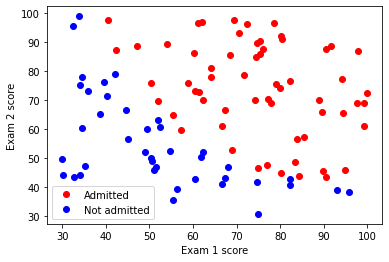

In [6]:
plotData(X, y)
# add axes labels
pyplot.xlabel('Exam 1 score')
pyplot.ylabel('Exam 2 score')
pyplot.legend(['Admitted', 'Not admitted'])
pass

<a id="section1"></a>
### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function - Bài tập khởi động: chức năng sigmoid

Trước khi bạn bắt đầu với cost function thực tế, hãy nhớ lại rằng giả thuyết hồi quy logistic được xác định là:\
Before you start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$h_\theta(x) = g(\theta^T x)$$

Trong đó function $g$ là sigmoid function. Sigmoid function được định nghĩa là:\
where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$

Bước đầu tiên của bạn là hiện thực hàm `sigmoid` để nó có thể
được gọi bởi phần còn lại của chương trình của bạn. Khi bạn kết thúc, hãy thử kiểm tra một vài
giá trị bằng cách gọi `sigmoid (x)` trong một cell mới. Đối với các giá trị dương lớn của `x`, sigmoid phải gần 1, trong khi đối với các giá trị âm lớn, sigmoid phải gần 0. Đánh giá `sigmoid(0)` sẽ cung cấp cho bạn chính xác bằng 0,5. Mã của bạn cũng sẽ hoạt động với các vectơ và ma trận. **Đối với ma trận, chức năng của bạn sẽ thực hiện chức năng sigmoid trên mọi phần tử.** \
Your first step is to implement this function `sigmoid` so it can be
called by the rest of your program. When you are finished, try testing a few
values by calling `sigmoid(x)` in a new cell. For large positive values of `x`, the sigmoid should be close to 1, while for large negative values, the sigmoid should be close to 0. Evaluating `sigmoid(0)` should give you exactly 0.5. Your code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

In [7]:
def sigmoid(z):
    """
    Compute sigmoid function given the input z.
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
        
    Instructions
    ------------
    Compute the sigmoid of each value of z (z can be a matrix, vector or scalar).
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # You need to return the following variables correctly 
    g = np.zeros(z.shape)

    # ====================== YOUR CODE HERE ======================

    g = 1/(1+np.exp(-z))

    # =============================================================
    return g

The following cell evaluates the sigmoid function at `z=0`. You should get a value of 0.5. You can also try different values for `z` to experiment with the sigmoid function.

In [8]:
# Test the implementation of sigmoid function here
z = [0, 100]
g = sigmoid(z)

print('g(', z, ') = ', g)

g( [0, 100] ) =  [0.5 1. ]


After completing a part of the exercise, you can submit your solutions for grading by first adding the function you modified to the submission object, and then sending your function to Coursera for grading. 

The submission script will prompt you for your login e-mail and submission token. You can obtain a submission token from the web page for the assignment. You are allowed to submit your solutions multiple times, and we will take only the highest score into consideration.

Execute the following cell to grade your solution to the first part of this exercise.

*You should now submit your solutions.*

In [165]:
# appends the implemented function in part 1 to the grader object
grader[1] = sigmoid

# send the added functions to coursera grader for getting a grade on this part
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

[ 0.15835362  0.22155003 -0.10490599]
[ 0.15835362  0.22155003 -0.10490599]
0.5 0.0625
0.5 0.0625
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   5 /   5 | Nice work!
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   5 /   5 | Nice work!
                                    Predict |  15 /  15 | Nice work!
       Regularized Logistic Regression Cost |  15 /  15 | Nice work!
                                  --------------------------------
                                            | 100 / 100 |  



<a id="section2"></a>
#### 1.2.2 Cost function and gradient

Bây giờ bạn sẽ hiện thực cost function và gradient cho hồi quy logistic. Trước khi tiến hành, chúng tôi thêm hệ số chặn vào X.\
Now you will implement the cost function and gradient for logistic regression. Before proceeding we add the intercept term to X. 

In [9]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

Bây giờ, hoàn thành mã cho hàm `CostFunction` để trả về chi phí và độ dốc. Nhớ lại rằng cost function trong hồi quy logistic là\
Now, complete the code for the function `costFunction` to return the cost and gradient. Recall that the cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

và gradient của cost là một vectơ có cùng độ dài với $\theta$ trong đó phần tử thứ
$j^{th}$ (với $j = 0, 1, \cdots, n$) được định nghĩa như sau:\
and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$
element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Lưu ý rằng trong khi gradient này trông giống hệt với gradient hồi quy tuyến tính, công thức thực sự khác nhau do hồi quy tuyến tính và logistic có định nghĩa khác nhau ở $h_\theta(x)$.\
Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [36]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n+1, ).
    
    X : array_like
        The input dataset of shape (m x n+1) where m is the total number
        of data points and n is the number of features. We assume the 
        intercept has already been added to the input.
    
    y : arra_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n+1, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    # J = 0
    # grad = np.zeros(theta.shape)

    # ====================== YOUR CODE HERE ======================
    h = sigmoid(X @ theta)
    J = 1/m * (np.sum(-y @ np.log(h) - (1 - y) @ np.log(1-h)))
    grad = 1/m * ((h - y)@X)
    # =============================================================
    return J, grad

Once you are done call your `costFunction` using two test cases for  $\theta$ by executing the next cell.

In [37]:
# Initialize fitting parameters
initial_theta = np.zeros(n+1)

cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


*You should now submit your solutions.*

In [34]:
grader[2] = costFunction
grader[3] = costFunction
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

[ 0.15835362  0.22155003 -0.10490599]
[ 0.15835362  0.22155003 -0.10490599]
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   0 /   5 | Your answer is incorrect.
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   0 /   5 | Your answer is incorrect.
                                    Predict |   0 /  15 | Your answer is incorrect.
       Regularized Logistic Regression Cost |   0 /  15 | Your answer is incorrect.
                                  --------------------------------
                                            |  60 / 100 |  



#### 1.2.3 Learning parameters using `scipy.optimize`

Trong bài tập trước, bạn đã tìm thấy các tham số tối ưu của mô hình hồi quy tuyến tính bằng cách triển khai gradient descent.Bạn đã viết một cost function và tính toán gradient của nó, sau đó lấy một bước gradient descent phù hợp. Lần này, thay vì thực hiện các bước Gradient Decent, bạn sẽ sử dụng mô-đun [`scipy.optimize`] (https://docs.scipy.org/doc/scipy/reference/optimize.html).Scipy là một thư viện tính toán số cho `python`.Nó cung cấp một mô-đun tối ưu hóa để tìm kiếm và gradient descent. Tính đến `scipy 1.0`, hàm` scipy.optimize.minimize` là phương thức để sử dụng để giải quyết các vấn đề tối ưu hóa (cả bị hạn chế và không bị hạn chế).\
In the previous assignment, you found the optimal parameters of a linear regression model by implementing gradient descent. You wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. This time, instead of taking gradient descent steps, you will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). SciPy is a numerical computing library for `python`. It provides an optimization module for root finding and minimization. As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

Để hồi quy logistic, bạn muốn tối ưu hóa cost function $J(\theta)$ với các tham số $\theta$ .
Cụ thể, bạn sẽ sử dụng `optimize.minimize` để tìm các tham số tốt nhất $\theta$ cho cost function hồi quy logistic, được cung cấp một bộ dữ liệu cố định (của các giá trị x và y). Bạn sẽ chuyển sang `optimize.minimize` các đầu vào sau:
- `CostFunction`: Một cost function, khi được đưa ra bộ đào tạo và một $\theta $, tính toán cost function hồi quy logistic và gradient đối với $\theta$ cho bộ dữ liệu (x, y). Điều quan trọng cần lưu ý là chúng tôi chỉ chuyển tên của hàm mà không có dấu ngoặc đơn. Điều này chỉ ra rằng chúng ta chỉ cung cấp một tham chiếu đến chức năng này và không đánh giá kết quả từ hàm này.
- `init_theta`: các giá trị ban đầu của các tham số mà chúng ta đang cố gắng tối ưu hóa.
- `(X, y)`: Đây là những đối số bổ sung cho cost function.
- `jac`: Chỉ định nếu cost function trả về Jacobian (Gradient) cùng với giá trị chi phí. (True)
- `method`: Phương pháp tối ưu hóa / Thuật toán để sử dụng
- `options`: Các tùy chọn bổ sung có thể dành riêng cho phương thức tối ưu hóa cụ thể. Trong bài này, chúng tôi chỉ nói với thuật toán số lượng lặp tối đa trước khi nó chấm dứt.


For logistic regression, you want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, you are going to use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). You will pass to `optimize.minimize` the following inputs:
- `costFunction`: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function.
- `initial_theta`: The initial values of the parameters we are trying to optimize.
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: Indication if the cost function returns the Jacobian (gradient) along with cost value. (True)
- `method`: Optimization method/algorithm to use
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

Nếu bạn đã hoàn thành chính xác `costFunction`,` optimize.minimize` sẽ hội tụ vào các tham số tối ưu hóa đúng và trả về các giá trị cuối cùng của chi phí và $\theta$ trong một đối tượng lớp. Lưu ý rằng bằng cách sử dụng `optimize.minimize`, bạn không phải tự viết bất kỳ vòng lặp nào, hoặc đặt tốc độ học tập như bạn đã làm cho Gradient Descent .Tất cả điều này được thực hiện bởi `optimize.minimize`: Bạn chỉ cần cung cấp một hàm tính cost và gradient.\
If you have completed the `costFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object. Notice that by using `optimize.minimize`, you did not have to write any loops yourself, or set a learning rate like you did for gradient descent. This is all done by `optimize.minimize`: you only needed to provide a function calculating the cost and the gradient.

In the following, we already have code written to call `optimize.minimize` with the correct arguments.

In [38]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Once `optimize.minimize` completes, we want to use the final value for $\theta$ to visualize the decision boundary on the training data as shown in the figure below. 

![](Figures/decision_boundary1.png)

To do so, we have written a function `plotDecisionBoundary` for plotting the decision boundary on top of training data. You do not need to write any code for plotting the decision boundary, but we also encourage you to look at the code in `plotDecisionBoundary` to see how to plot such a boundary using the $\theta$ values. You can find this function in the `utils.py` file which comes with this assignment.

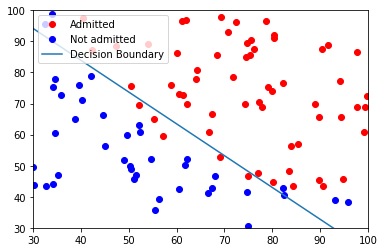

In [39]:
# Plot Boundary
utils.plotDecisionBoundary(plotData, theta, X, y)

<a id="section4"></a>
#### 1.2.4 Evaluating logistic regression

Sau khi học các thông số, bạn có thể sử dụng mô hình để dự đoán liệu một học sinh cụ thể sẽ được thừa nhận hay chưa.Đối với một sinh viên có điểm thi 1 là 45 và điểm thi 2 là 85, bạn sẽ thấy xác suất nhập học là 0,776. Một cách khác để đánh giá chất lượng của các tham số mà chúng tôi đã tìm thấy là để xem mô hình đã học được dự đoán tốt như thế nào đối với bộ đào tạo của chúng tôi.Trong phần này, nhiệm vụ của bạn là hoàn thành code trong hàm `predict`.Hàm predict sẽ tạo ra các dự đoán "1" hoặc "0" được đưa ra từ một bộ dữ liệu và một vectơ tham số đã học được $\theta$ .\
After learning the parameters, you can use the model to predict whether a particular student will be admitted. For a student with an Exam 1 score of 45 and an Exam 2 score of 85, you should expect to see an admission probability of 0.776. Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts on our training set. In this part, your task is to complete the code in function `predict`. The predict function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$. 
<a id="predict"></a>

In [56]:
def predict(theta, X):
    """
    Predict whether the label is 0 or 1 using learned logistic regression.
    Computes the predictions for X using a threshold at 0.5 
    (i.e., if sigmoid(theta.T*x) >= 0.5, predict 1)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vecotor of shape (n+1, ).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions and 0 or 1 for each row in X. 
    
    Instructions
    ------------
    Complete the following code to make predictions using your learned 
    logistic regression parameters.You should set p to a vector of 0's and 1's    
    """
    m = X.shape[0] # Number of training examples

    # You need to return the following variables correctly
    p = np.zeros(m)

    # ====================== YOUR CODE HERE ======================
    pre = sigmoid(X @ theta)
    p[pre>=0.5] = 1
    
    # ============================================================
    return p

Sau khi bạn đã hoàn thành mã trong `predict`, chúng tôi tiến hành báo cáo độ chính xác đào tạo của phân loại của bạn bằng cách tính phần trăm mẫu nó đã đúng.\
After you have completed the code in `predict`, we proceed to report the training accuracy of your classifier by computing the percentage of examples it got correct.

In [57]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores 45 and 85,'
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores 45 and 85,we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


*You should now submit your solutions.*

In [58]:
grader[4] = predict
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

[ 0.15835362  0.22155003 -0.10490599]
[ 0.15835362  0.22155003 -0.10490599]
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   0 /   5 | Your answer is incorrect.
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   5 /   5 | Nice work!
                                    Predict |   0 /  15 | Your answer is incorrect.
       Regularized Logistic Regression Cost |   0 /  15 | Your answer is incorrect.
                                  --------------------------------
                                            |  65 / 100 |  



## 2 Regularized logistic regression

Trong phần này của bài tập, bạn sẽ thực hiện regularization hồi quy logistic để dự đoán liệu vi mạch từ một nhà máy chế tạo đảm bảo chất lượng (QA) hay không.Trong QA, mỗi microchip đi qua các thử nghiệm khác nhau để đảm bảo nó hoạt động chính xác. \
In this part of the exercise, you will implement regularized logistic regression to predict whether microchips from a fabrication plant passes quality assurance (QA). During QA, each microchip goes through various tests to ensure it is functioning correctly.


Giả sử bạn là người quản lý sản phẩm của nhà máy và bạn có kết quả kiểm tra cho một số vi mạch trong hai bài kiểm tra khác nhau. Từ hai bài kiểm tra này, bạn muốn xác định xem vi mạch có nên được chấp nhận hoặc từ chối hay không.Để giúp bạn đưa ra quyết định, bạn có một bộ dữ liệu kết quả kiểm tra trên các vi mạch trong quá khứ, từ đó bạn có thể xây dựng một mô hình hồi quy logistic. \
Suppose you are the product manager of the factory and you have the test results for some microchips on two different tests. From these two tests, you would like to determine whether the microchips should be accepted or rejected. To help you make the decision, you have a dataset of test results on past microchips, from which you can build a logistic regression model.

Đầu tiên, chúng tôi tải dữ liệu từ tệp CSV:\
First, we load the data from a CSV file:

In [59]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X = data[:, :2]
y = data[:, 2]

### 2.1 Visualize the data

Similar to the previous parts of this exercise, `plotData` is used to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with
different markers.

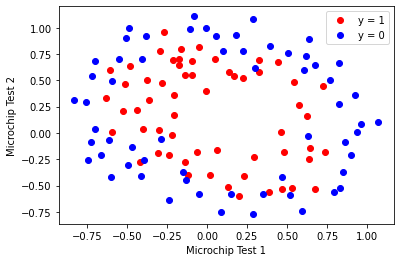

In [60]:
plotData(X, y)
# Labels and Legend
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')

# Specified in plot order
pyplot.legend(['y = 1', 'y = 0'], loc='upper right')
pass

Hình trên cho thấy bộ dữ liệu của chúng tôi không thể được tách thành các ví dụ tích cực và tiêu cực bằng một đường thẳng thông qua biểu đồ. Do đó, một mô hình thẳng cho hồi quy logistic sẽ không hoạt động tốt trên bộ dữ liệu này vì hồi quy logistic sẽ chỉ có thể tìm thấy một ranh giới quyết định (decision boundary) tuyến tính (linear).\
The above figure shows that our dataset cannot be separated into positive and negative examples by a straight-line through the plot. Therefore, a straight-forward application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary.

### 2.2 Feature mapping

Một cách để fit với dữ liệu tốt hơn là tạo thêm các đặc trưng từ mỗi điểm dữ liệu. Trong hàm `mapFeature` được xác định trong tệp `utils.py`, chúng tôi sẽ ánh xạ các đặc trưng vào tất cả các đa thức là $x_1 $ nhân $x_2 $ lên đến mũ 6.\
One way to fit the data better is to create more features from each data point. In the function `mapFeature` defined in the file `utils.py`, we will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

Với kết quả của mapping này, vectơ hai đặc trưng của chúng tôi (điểm số trên hai bài kiểm tra QA) đã được chuyển đổi thành một vectơ 28 chiều. Một bộ phân loại hồi quy logistic được đào tạo về vectơ đặc trưng nhiều chiều hơn sẽ có một ranh giới quyết định phức tạp hơn và sẽ xuất hiện phi tuyến khi được vẽ trong biểu đồ 2 chiều của chúng tôi.\
As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

Trong khi ánh xạ tính năng cho phép chúng ta xây dựng một phân loại chi tiết hơn, nó cũng dễ bị overfit.Trong các phần tiếp theo của bài tập, bạn sẽ thực hiện regularization hồi quy logistic để phù hợp với dữ liệu và cũng thấy cho mình cách thức regularization có thể giúp chống lại vấn đề overfitting.\
While the feature mapping allows us to build a more expressive classifier, it also more susceptible to overfitting. In the next parts of the exercise, you will implement regularized logistic regression to fit the data and also see for yourself how regularization can help combat the overfitting problem.


In [61]:
# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])

<a id="section5"></a>
### 2.3 Cost function and gradient

Bây giờ bạn sẽ thực hiện mã để tính toán cost function và gradient để regularized hồi quy logistic. Hoàn thành mã cho chức năng `costFunctionReg` dưới đây để trả về cost và gradient.\
Now you will implement code to compute the cost function and gradient for regularized logistic regression. Complete the code for the function `costFunctionReg` below to return the cost and gradient.

Nhớ lại rằng regularized cost function trong hồi quy logistic là\
Recall that the regularized cost function in logistic regression is

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Lưu ý rằng bạn không nên regularize các tham số $\theta_0$.Gradient của cost function là một vectơ trong đó phần tử $j^{th}$ được xác định như sau:\
Note that you should not regularize the parameters $\theta_0$. The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$
<a id="costFunctionReg"></a>

In [160]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # Initialize some useful values
    m = y.size  # number of training examples

    # You need to return the following variables correctly 
    J = 0
    grad = np.zeros(theta.shape)

    # ===================== YOUR CODE HERE ====================== 
    h = sigmoid(X @ theta)
    print(np.sum(theta[1:]**2), np.sum((theta*theta)[:1]))
    # J = 1/m * (-y[1:] @ np.log(h)[1:] - (1 - y[1:]) @ np.log(1-h)[1:]) + (lambda_/(2*m)) * np.sum(theta[1:]**2)
    J = -1/ m *np.sum(((y * np.log(h)) + (1 - y) * np.log(1-h))) + (lambda_/(2*m)) * np.sum((theta**2)[1:])
    grad = 1/m * ((h - y)@X)
    grad[1:] = grad[1:] + (lambda_ / m )*theta[1:]
    
    
    # =============================================================
    return J, grad

Once you are done with the `costFunctionReg`, we call it below using the initial value of $\theta$ (initialized to all zeros), and also another test case where $\theta$ is all ones.

In [161]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at test theta - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

0.0 0.0
Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

27.0 1.0
------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at test theta - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


*You should now submit your solutions.*

In [164]:
grader[5] = costFunctionReg
grader[6] = costFunctionReg
grader.grade()


Submitting Solutions | Programming Exercise logistic-regression

[ 0.15835362  0.22155003 -0.10490599]
[ 0.15835362  0.22155003 -0.10490599]
0.5 0.0625
0.5 0.0625
                                  Part Name |     Score | Feedback
                                  --------- |     ----- | --------
   Regularized Logistic Regression Gradient |   0 /   5 | Your answer is incorrect.
                           Sigmoid Function |  30 /  30 | Nice work!
                   Logistic Regression Cost |  30 /  30 | Nice work!
               Logistic Regression Gradient |   5 /   5 | Nice work!
                                    Predict |  15 /  15 | Nice work!
       Regularized Logistic Regression Cost |  15 /  15 | Nice work!
                                  --------------------------------
                                            |  95 / 100 |  



#### 2.3.1 Learning parameters using `scipy.optimize.minimize`

Similar to the previous parts, you will use `optimize.minimize` to learn the optimal parameters $\theta$. If you have completed the cost and gradient for regularized logistic regression (`costFunctionReg`) correctly, you should be able to step through the next part of to learn the parameters $\theta$ using `optimize.minimize`.

### 2.4 Plotting the decision boundary

To help you visualize the model learned by this classifier, we have provided the function `plotDecisionBoundary` which plots the (non-linear) decision boundary that separates the positive and negative examples. In `plotDecisionBoundary`, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and draw a contour plot where the predictions change from y = 0 to y = 1. 

### 2.5 Optional (ungraded) exercises

In this part of the exercise, you will get to try out different regularization parameters for the dataset to understand how regularization prevents overfitting.

Notice the changes in the decision boundary as you vary $\lambda$. With a small
$\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data. See the following figures for the decision boundaries you should get for different values of $\lambda$. 

<table>
    <tr>
        <td style="text-align:center">
            No regularization (overfitting)<img src="Figures/decision_boundary3.png">
        </td>        
        <td style="text-align:center">
            Decision boundary with regularization
            <img src="Figures/decision_boundary2.png">
        </td>
        <td style="text-align:center">
            Decision boundary with too much regularization
            <img src="Figures/decision_boundary4.png">
        </td>        
    <tr>
</table>

This is not a good decision boundary: for example, it predicts that a point at $x = (−0.25, 1.5)$ is accepted $(y = 1)$, which seems to be an incorrect decision given the training set.
With a larger $\lambda$, you should see a plot that shows an simpler decision boundary which still separates the positives and negatives fairly well. However, if $\lambda$ is set to too high a value, you will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data.

/mnt/d/TaiLieuHocTap/Coursera/MachineLearning/Assignments/Exercise2/utils.py:45: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(out)


Train Accuracy: 83.1 %
Expected accuracy (with lambda = 1): 83.1 % (approx)



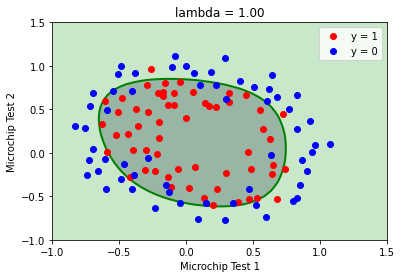

In [141]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1 (you should vary this)
lambda_ = 1

# set options for optimize.minimize
options= {'maxiter': 100}

res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y, lambda_),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of OptimizeResult object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property of the result
theta = res.x

utils.plotDecisionBoundary(plotData, theta, X, y)
pyplot.xlabel('Microchip Test 1')
pyplot.ylabel('Microchip Test 2')
pyplot.legend(['y = 1', 'y = 0'])
pyplot.grid(False)
pyplot.title('lambda = %0.2f' % lambda_)

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: %.1f %%' % (np.mean(p == y) * 100))
print('Expected accuracy (with lambda = 1): 83.1 % (approx)\n')


*You do not need to submit any solutions for these optional (ungraded) exercises.*